In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
dia_data=pd.read_csv("diabetes.csv")

In [6]:
dia_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
dia_data['Diabetes'].replace(['pos','neg'],[1,0],inplace=True)

In [20]:
dia_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
features=dia_data.iloc[:,:-1]

In [10]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [11]:
labels=dia_data.iloc[:,-1]

In [12]:
labels

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Diabetes, Length: 768, dtype: int64

In [29]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [25]:
import statsmodels.api as sm
model=sm.OLS(y,X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     90.10
Date:                Fri, 17 May 2019   Prob (F-statistic):          9.04e-105
Time:                        14:36:13   Log-Likelihood:                -429.34
No. Observations:                 768   AIC:                             874.7
Df Residuals:                     760   BIC:                             911.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0247      0.005      4.536      0.000       0.014       0.035
Glucose                      0.0039      0.001      7.701      0.000       0.003       0.005
BloodPressure               -0.0049      0.001     -6.005      0.000      -0.007      -0.003
SkinThickness             5.752e-05      0.001      0.049      0.961      -0.002       0.002
Insulin                   4.783e-05      0.000      0.304      0.761      -0.000       0.000
BMI                          0.0042      0.002      2.094      0.037       0.000       0.008
DiabetesPedigreeFunction     0.0980      0.048      2.059      0.040       0.005       0.191
Age                         -0.0010      0.002     -0.652      0.515      -0.004       0.002
==============================================================================
Omnibus:                      294.015   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.012
Skew:                           0.574   Prob(JB):                     4.22e-18
Kurtosis:                       1.913   Cond. No.                         575.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn import preprocessing as pre

In [14]:
minmax=pre.MinMaxScaler(feature_range=(0,1))

In [16]:
minmax.fit(features)

C:\Users\Krish\Anaconda3\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
minmax.transform(features)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

# mulivarient class classification

In [18]:
X=features
y=labels

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors, model_selection

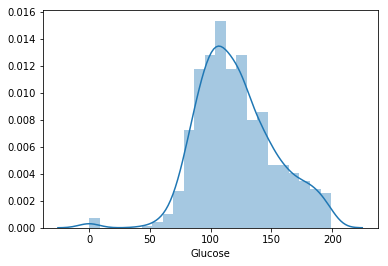

In [30]:
sns.distplot(dia_data['Glucose'])

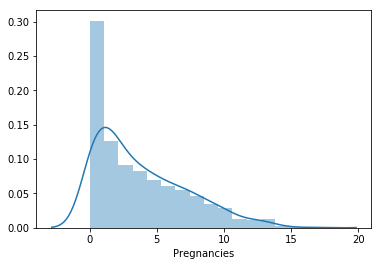

In [31]:
sns.distplot(dia_data['Pregnancies'])

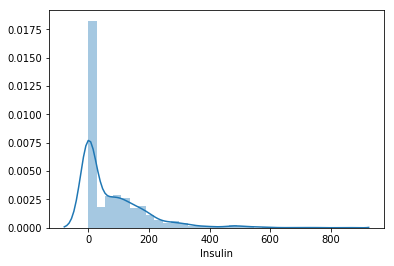

In [51]:
sns.distplot(dia_data['Insulin'])

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

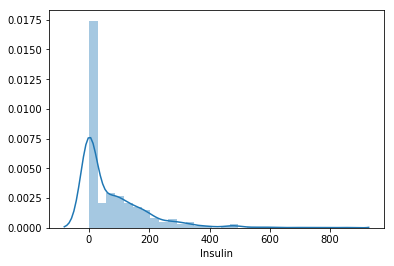

In [52]:
sns.distplot(X_train['Insulin'])

In [47]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

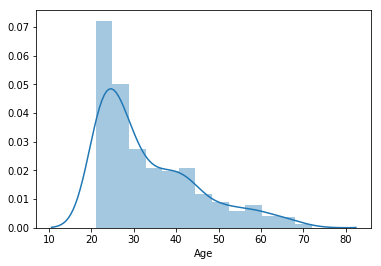

In [48]:
sns.distplot(X_train['Age'])

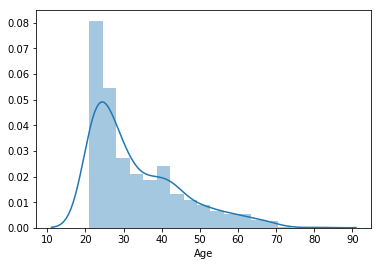

In [50]:
sns.distplot(dia_data['Age'])

In [37]:
y_predict=clf.predict(X_test)
print('Actual breast cancer:')
print(y_test.values)

Actual breast cancer:
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [38]:
print('predicted test data')
print(y_predict)

predicted test data
[1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0]


In [39]:
#accuracy score using sklearn
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [40]:
print('accuracy : %f'%(accuracy_score(y_test,y_predict)*100))

accuracy : 73.376623


In [41]:
print('roc score : %f'%(roc_auc_score(y_test,y_predict)*100))

roc score : 69.595960


In [42]:
print('recall score : %f'%(recall_score(y_test,y_predict)*100))

recall score : 56.363636


In [43]:
print(confusion_matrix(y_test,y_predict))

[[82 17]
 [24 31]]


In [53]:
features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# model for preg , glu , Diap,Age

In [55]:
X=features.iloc[:,[0,1,6,7]]
y=labels

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [57]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
y_predict=clf.predict(X_test)
print('Actual breast cancer:')
print(y_test.values)

Actual breast cancer:
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [59]:
print('predicted test data')
print(y_predict)

predicted test data
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [60]:
print('accuracy : %f'%(accuracy_score(y_test,y_predict)*100))

accuracy : 73.376623


In [61]:
print('roc score : %f'%(roc_auc_score(y_test,y_predict)*100))

roc score : 69.191919


In [62]:
print('recall score : %f'%(recall_score(y_test,y_predict)*100))

recall score : 54.545455


In [64]:
print(confusion_matrix(y_test,y_predict))

[[83 16]
 [25 30]]


# model for preg , glu , BMI , age

In [65]:
X=features.iloc[:,[0,1,5,7]]
y=labels

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [67]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
y_predict=clf.predict(X_test)
print('Actual breast cancer:')
print(y_test.values)

Actual breast cancer:
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [69]:
print('predicted test data')
print(y_predict)

predicted test data
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [70]:
print('accuracy : %f'%(accuracy_score(y_test,y_predict)*100))

accuracy : 76.623377


In [71]:
print('roc score : %f'%(roc_auc_score(y_test,y_predict)*100))

roc score : 74.141414


In [72]:
print('recall score : %f'%(recall_score(y_test,y_predict)*100))

recall score : 65.454545


In [73]:
print(confusion_matrix(y_test,y_predict))

[[82 17]
 [19 36]]
